# Anime Rating Case Study

## Context

Streamist is a streaming company that streams web series and movies for a worldwide audience. Every content on their portal is rated by the viewers, and the portal also provides other information for the content like the number of people who have watched it, the number of people who want to watch it, the number of episodes, duration of an episode, etc.

They are currently focusing on the anime available in their portal, and want to identify the most important factors involved in rating an anime. You as a data scientist at Streamist are tasked with identifying the important factors and building a predictive model to predict the rating on an anime.


## Objective

To preprocess the raw data, analyze it, and build a linear regression model to predict the ratings of anime.


## Key Questions

1. What are the key factors influencing the rating of an anime?
2. Is there a good predictive model for the rating of an anime? What does the performance assessment look like for such a model?


## Data Information

Each record in the database provides a description of an anime. A detailed data dictionary can be found below.

**Data Dictionary**

- title - the title of anime
- mediaType - format of publication
- eps - number of episodes (movies are considered 1 episode)
- duration - duration of an episode
- ongoing - whether it is ongoing
- startYr - year that airing started
- finishYr - year that airing finished
- sznOfRelease - the season of release (Winter, Spring, Fall)
- description - the synopsis of the plot
- studios - studios responsible for creation
- contentWarn - whether anime has a content warning
- watched - number of users that completed it
- watching - number of users that are watching it
- wantWatch - number of users that want to watch it
- dropped - number of users that dropped it before completion
- rating - average user rating
- votes - number of votes that contribute to rating
- tag_<tag/genre> - whether the anime has the certain tag or falls in the certain genre

## Let's start coding!

### Import necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

## loading the dataset

In [2]:
data = pd.read_csv(r"C:\Users\ajayi\Downloads\anime_data_raw.csv")

In [3]:
# checking the shape of the data

data.shape

(14578, 48)

In [4]:
# let's view a sample of the data

data.sample(5)

,title,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,contentWarn,watched,watching,wantWatch,dropped,rating,votes,tag_'Comedy',tag_'Based on a Manga',tag_'Action',tag_'Fantasy',tag_'Sci Fi',tag_'Shounen',tag_'Family Friendly',tag_'Original Work',tag_'Non-Human Protagonists',tag_'Adventure',tag_'Short Episodes',tag_'Drama',tag_'Shorts',tag_'Romance',tag_'School Life',tag_'Slice of Life',tag_'Animal Protagonists',tag_'Seinen',tag_'Supernatural',tag_'Magic',tag_'CG Animation',tag_'Mecha',tag_'Ecchi',tag_'Based on a Light Novel',tag_'Anthropomorphic',tag_'Superpowers',tag_'Promotional',tag_'Sports',tag_'Historical',tag_'Vocaloid',tag_Others
6341,Shin Kyojin no Hoshi II,TV,23.0,NaN,False,1979.0,1979.0,NaN,NaN,['TMS Entertainment'],0,19.0,1,28,1,2.908,14.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2953,Mu Wang Zhi Wang: Han Tie Dou,Web,21.0,NaN,False,2017.0,2017.0,NaN,NaN,[],0,19.0,16,102,1,3.632,11.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7432,Natsuki Crisis,OVA,2.0,NaN,False,1994.0,1994.0,NaN,Natsuki loves martial arts and is a young stud...,['MADHOUSE'],0,291.0,15,293,14,2.677,168.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4401,The Testament of Sister New Devil Specials,DVD Special,6.0,3min,False,2015.0,2015.0,NaN,NaN,['Production IMS'],1,2053.0,186,1560,39,3.314,1146.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10095,2002-nen Baachan Ondo,Music Video,1.0,2min,False,2002.0,2002.0,NaN,NaN,[],0,31.0,0,10,0,2.048,16.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


* The `duration` column has values in hours and minutes.
* The `studios` column has a list of values.
* There are a lot of missing values.

In [5]:
# creating a copy of the data so that original data remains unchanged

df = data.copy()

In [6]:
# checking for duplicate values in the data

df.duplicated().sum()


0

- There are no duplicate values in the data.

In [7]:
# checking the names of the columns in the data

df.columns

Index(['title', 'mediaType', 'eps', 'duration', 'ongoing', 'startYr',
       'finishYr', 'sznOfRelease', 'description', 'studios', 'contentWarn',
       'watched', 'watching', 'wantWatch', 'dropped', 'rating', 'votes',
       'tag_'Comedy'', 'tag_'Based on a Manga'', 'tag_'Action'',
       'tag_'Fantasy'', 'tag_'Sci Fi'', 'tag_'Shounen'',
       'tag_'Family Friendly'', 'tag_'Original Work'',
       'tag_'Non-Human Protagonists'', 'tag_'Adventure'',
       'tag_'Short Episodes'', 'tag_'Drama'', 'tag_'Shorts'', 'tag_'Romance'',
       'tag_'School Life'', 'tag_'Slice of Life'', 'tag_'Animal Protagonists'',
       'tag_'Seinen'', 'tag_'Supernatural'', 'tag_'Magic'',
       'tag_'CG Animation'', 'tag_'Mecha'', 'tag_'Ecchi'',
       'tag_'Based on a Light Novel'', 'tag_'Anthropomorphic'',
       'tag_'Superpowers'', 'tag_'Promotional'', 'tag_'Sports'',
       'tag_'Historical'', 'tag_'Vocaloid'', 'tag_Others'],
      dtype='object')

In [8]:
# checking column datatypes and number of non-null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14578 entries, 0 to 14577
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         14578 non-null  object 
 1   mediaType                     14510 non-null  object 
 2   eps                           14219 non-null  float64
 3   duration                      9137 non-null   object 
 4   ongoing                       14578 non-null  bool   
 5   startYr                       14356 non-null  float64
 6   finishYr                      14134 non-null  float64
 7   sznOfRelease                  3767 non-null   object 
 8   description                   8173 non-null   object 
 9   studios                       14578 non-null  object 
 10  contentWarn                   14578 non-null  int64  
 11  watched                       14356 non-null  float64
 12  watching                      14578 non-null  int64  
 13  w

* There are many numeric (*float* and *int* type) and string (*object* type) columns in the data.
* Dependent variable is the rating of an anime, which is of *float* type.
* `ongoing` column is of *bool* type.

In [9]:
# checking for missing values in the data.
df.isnull().sum()


title                               0
mediaType                          68
eps                               359
duration                         5441
ongoing                             0
startYr                           222
finishYr                          444
sznOfRelease                    10811
description                      6405
studios                             0
contentWarn                         0
watched                           222
watching                            0
wantWatch                           0
dropped                             0
rating                           2471
votes                            2459
tag_'Comedy'                        0
tag_'Based on a Manga'              0
tag_'Action'                        0
tag_'Fantasy'                       0
tag_'Sci Fi'                        0
tag_'Shounen'                       0
tag_'Family Friendly'               0
tag_'Original Work'                 0
tag_'Non-Human Protagonists'        0
tag_'Adventu

* There are missing values in many columns.

In [10]:
# Let's look at the statistical summary of the data (Transpose since columns are many)

df.describe(include = "all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,14578,14578,Gosick,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mediaType,14510,8,TV,4510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eps,14219.0,NaN,NaN,NaN,13.501231,62.262185,1.0,1.0,1.0,12.0,2527.0
duration,9137,147,4min,964,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ongoing,14578,2,False,14356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
startYr,14356.0,NaN,NaN,NaN,2005.457788,14.707105,1907.0,2000.0,2010.0,2016.0,2026.0
finishYr,14134.0,NaN,NaN,NaN,2005.515919,14.656509,1907.0,2000.0,2010.0,2016.0,2026.0
sznOfRelease,3767,4,Spring,1202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,8173,8108,The films will follow The First Summer of Love...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
studios,14578,864,[],4808,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* We can see that the anime ratings vary between 0.844 and 4.702, which suggests that the anime were rated on a scale of 0-5.
* *TV* is the most occurring type of media.
* For anime whose season of release is available, *Spring* is the most common season.
* The number of views for the anime in the data has a very wide range (0 to more than 160,000).

### From the data overview, we see that many columns in the data need to be preprocessed before they can be used for analysis.

## Data Preprocessing

### We will drop the missing values in `rating` column as it is the target variable.

In [11]:
# use subset in dropna to list the column

df.dropna(subset = ["rating"], inplace = True)

In [12]:
# let us reset the dataframe index


df.reset_index(drop = True, inplace=True)

In [13]:
# checking missing values in rest of the data


df.isnull().sum()

title                              0
mediaType                         63
eps                                0
duration                        4636
ongoing                            0
startYr                            6
finishYr                         121
sznOfRelease                    8560
description                     4474
studios                            0
contentWarn                        0
watched                          115
watching                           0
wantWatch                          0
dropped                            0
rating                             0
votes                              0
tag_'Comedy'                       0
tag_'Based on a Manga'             0
tag_'Action'                       0
tag_'Fantasy'                      0
tag_'Sci Fi'                       0
tag_'Shounen'                      0
tag_'Family Friendly'              0
tag_'Original Work'                0
tag_'Non-Human Protagonists'       0
tag_'Adventure'                    0
t

### Let us look at the entries with no start year.

In [14]:
# startYr with null

df[df.startYr.isnull()]

,title,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,contentWarn,watched,watching,wantWatch,dropped,rating,votes,tag_'Comedy',tag_'Based on a Manga',tag_'Action',tag_'Fantasy',tag_'Sci Fi',tag_'Shounen',tag_'Family Friendly',tag_'Original Work',tag_'Non-Human Protagonists',tag_'Adventure',tag_'Short Episodes',tag_'Drama',tag_'Shorts',tag_'Romance',tag_'School Life',tag_'Slice of Life',tag_'Animal Protagonists',tag_'Seinen',tag_'Supernatural',tag_'Magic',tag_'CG Animation',tag_'Mecha',tag_'Ecchi',tag_'Based on a Light Novel',tag_'Anthropomorphic',tag_'Superpowers',tag_'Promotional',tag_'Sports',tag_'Historical',tag_'Vocaloid',tag_Others
1405,Unbelievable Space Love,Web,10.0,1min,False,NaN,NaN,NaN,NaN,[],0,90.0,16,343,0,4.012,54.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5222,Manbo-P: Irokoizata wa Subete Sakuzu de Kaiket...,Music Video,1.0,5min,False,NaN,NaN,NaN,NaN,[],0,41.0,0,25,0,3.139,20.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9813,Mameshiba: Mamerry Christmas,Other,1.0,1min,False,NaN,NaN,NaN,NaN,[],0,57.0,1,17,0,2.119,35.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10258,Meow no Hoshi,Other,1.0,5min,False,NaN,NaN,NaN,NaN,[],0,40.0,0,25,0,1.999,25.0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11970,Landmark,Web,1.0,4min,False,NaN,NaN,NaN,NaN,[],0,34.0,0,9,0,1.256,21.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12077,Burutabu-chan,Other,3.0,1min,False,NaN,NaN,NaN,NaN,[],0,46.0,1,10,1,1.046,33.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


* We will drop the entries with no start year as this is a difficult column to impute.
* The decision to drop these missing values or impute them by a suitable value is subject to domain knowledge, and based on the steps taken to deal with them, the model performance will vary.

## How to drop missing values

In [15]:
# drop the NAs in startYr
df.dropna(subset = ["startYr"], inplace=True)

# let us reset the dataframe index

df.reset_index(drop = True, inplace=True)

In [16]:
# checking missing values in rest of the data

df.isnull().sum()


title                              0
mediaType                         63
eps                                0
duration                        4636
ongoing                            0
startYr                            0
finishYr                         115
sznOfRelease                    8554
description                     4468
studios                            0
contentWarn                        0
watched                          115
watching                           0
wantWatch                          0
dropped                            0
rating                             0
votes                              0
tag_'Comedy'                       0
tag_'Based on a Manga'             0
tag_'Action'                       0
tag_'Fantasy'                      0
tag_'Sci Fi'                       0
tag_'Shounen'                      0
tag_'Family Friendly'              0
tag_'Original Work'                0
tag_'Non-Human Protagonists'       0
tag_'Adventure'                    0
t

### Let us look at the entries with no finish year.

In [17]:
# finishYr with null
df[df.finishYr.isnull()].describe(include = "all").T



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,115,115,Feng Ling Yu Xiu,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mediaType,115,6,TV,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eps,115.0,NaN,NaN,NaN,136.521739,408.981219,1.0,4.5,10.0,22.0,2527.0
duration,50,18,1min,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ongoing,115,1,True,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
startYr,115.0,NaN,NaN,NaN,2016.521739,8.053928,1969.0,2018.0,2020.0,2020.0,2020.0
finishYr,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sznOfRelease,75,4,Spring,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,79,79,"While attending Tensei Academy, Hiiro Ryugasak...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
studios,115,66,[],23,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# checking the summary of the data with missing values in finishYr (describe on finishYr with NULL)




* More than 25% of the entries with missing finish year are have started on or after 2018.
* So, we will assume that the anime with missing values in `finishYr` are still airing, and fill the values with 2020 (the year the data was collected).
* You can experiment by dropping the entries where the finish year is missing.
* The decision to drop these missing values or impute them by a suitable value is subject to domain knowledge, and based on the steps taken to deal with them, the model performance will vary.

## Filling NAs with values

In [19]:
# fill the NAs in finishYr with 2020 (set inplace to True)
df["finishYr"].fillna(2020, inplace = True)


# checking missing values in rest of the data

df.isnull().sum()

title                              0
mediaType                         63
eps                                0
duration                        4636
ongoing                            0
startYr                            0
finishYr                           0
sznOfRelease                    8554
description                     4468
studios                            0
contentWarn                        0
watched                          115
watching                           0
wantWatch                          0
dropped                            0
rating                             0
votes                              0
tag_'Comedy'                       0
tag_'Based on a Manga'             0
tag_'Action'                       0
tag_'Fantasy'                      0
tag_'Sci Fi'                       0
tag_'Shounen'                      0
tag_'Family Friendly'              0
tag_'Original Work'                0
tag_'Non-Human Protagonists'       0
tag_'Adventure'                    0
t

* The missing values in `startYr` and `finishYr` columns have been dealt with.
* **We will now create a new variable `years_running`, which will be calculated as `finishYr` minus `startYr`.**
* **We will also drop the `startYr` and `finishYr` columns.**

## Feature Engineering

In [20]:
# create a column called "years_running" (finishYr - startYr) to indicate the no of years an anime is airing
df["years_running"] = df["finishYr"] - df["startYr"]



In [21]:
# check the first 5 rows

df.head()

,title,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,contentWarn,watched,watching,wantWatch,dropped,rating,votes,tag_'Comedy',tag_'Based on a Manga',tag_'Action',tag_'Fantasy',tag_'Sci Fi',tag_'Shounen',tag_'Family Friendly',tag_'Original Work',tag_'Non-Human Protagonists',tag_'Adventure',tag_'Short Episodes',tag_'Drama',tag_'Shorts',tag_'Romance',tag_'School Life',tag_'Slice of Life',tag_'Animal Protagonists',tag_'Seinen',tag_'Supernatural',tag_'Magic',tag_'CG Animation',tag_'Mecha',tag_'Ecchi',tag_'Based on a Light Novel',tag_'Anthropomorphic',tag_'Superpowers',tag_'Promotional',tag_'Sports',tag_'Historical',tag_'Vocaloid',tag_Others,years_running
0,Fullmetal Alchemist: Brotherhood,TV,64.0,NaN,False,2009.0,2010.0,Spring,The foundation of alchemy is based on the law ...,['Bones'],1,103707.0,14351,25810,2656,4.702,86547.0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
1,your name.,Movie,1.0,1hr 47min,False,2016.0,2016.0,NaN,Mitsuha and Taki are two total strangers livin...,['CoMix Wave Films'],0,58831.0,1453,21733,124,4.663,43960.0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,A Silent Voice,Movie,1.0,2hr 10min,False,2016.0,2016.0,NaN,"After transferring into a new school, a deaf g...",['Kyoto Animation'],1,45892.0,946,17148,132,4.661,33752.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10.0,NaN,False,2016.0,2016.0,Fall,"Picking up where the second season ended, the ...",['Production I.G'],0,25134.0,2183,8082,167,4.660,17422.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0
4,Attack on Titan 3rd Season: Part II,TV,10.0,NaN,False,2019.0,2019.0,Spring,The battle to retake Wall Maria begins now! Wi...,['Wit Studio'],1,21308.0,3217,7864,174,4.650,15789.0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


## Dropping columns

In [22]:
# We can drop the start and finish years


df.drop(["startYr", "finishYr"], axis = 1, inplace=True)

In [23]:
df.duration.unique()

array([nan, '1hr 47min', '2hr 10min', '1hr 51min', '2hr 5min',
       '1hr 57min', '1hr 30min', '1hr 58min', '1hr 23min', '2hr 14min',
       '22min', '44min', '1hr 45min', '1hr 26min', '47min', '45min',
       '24min', '2hr 42min', '1hr 52min', '1hr 48min', '48min', '26min',
       '1hr 8min', '1hr 44min', '1hr 38min', '1hr 59min', '1hr 56min',
       '1hr 35min', '49min', '27min', '1hr 43min', '1hr 36min', '25min',
       '1hr 40min', '1hr 54min', '4min', '23min', '1hr 55min',
       '2hr 28min', '1hr 28min', '1hr 0min', '34min', '1hr 2min',
       '1hr 41min', '1hr 39min', '11min', '1hr 3min', '12min',
       '1hr 50min', '20min', '50min', '28min', '15min', '1hr 49min',
       '2hr 0min', '40min', '6min', '1hr 53min', '1hr 32min', '10min',
       '1hr 42min', '2hr 15min', '3min', '56min', '2hr 1min', '2hr 20min',
       '1hr 33min', '2hr 30min', '16min', '2hr 17min', '13min', '5min',
       '46min', '1hr 34min', '2hr 43min', '14min', '7min', '1hr 11min',
       '1hr 29min', '51min',

### Let's convert the `duration` column from string to numeric.

In [24]:
s1 = "4hr 10min"

s1.split()[1].replace("min", "")

'10'

In [25]:
# we define a function to convert the duration column to numeric  [1 * 60 + 47]

def time_to_minutes(var):
    # check if variable is a string
    if isinstance(var, str):
        # check for only hr
        if "hr" in var and "min" not in var:
            hr = float(var.replace("hr", "")) * 60
            return hr
        # check for only min
        elif "min" in var and "hr" not in var:
            mins = float(var.replace("min", ""))
            return mins
        # check for both hr and min 
        elif "hr" in var and "min" in var:
            hr = float(var.split()[0].replace("hr", "")) * 60
            mins = float(var.split()[1].replace("min", ""))
            return hr + mins
        # check for just number
        else:
            return float(var)
    # check for NAN
    else:
        return np.nan

In [26]:
# let's apply the function to the duration column and overwrite the column

df["duration"] = df["duration"].apply(time_to_minutes)



In [27]:
# let's check the summary of the duration column (using describe)

df.duration.describe()


count    7465.000000
mean       24.230141
std        31.468171
min         1.000000
25%         4.000000
50%         8.000000
75%        30.000000
max       163.000000
Name: duration, dtype: float64

* 50% of the anime in the data have a runtime less than or equal to 8 minutes.


* Some anime even have a runtime of 1 minute.
    - This seems strange at first, but a Google search can reveal that there are indeed such anime.

### We will fill the missing values in the `sznOfRelease` column with '*is_missing*', which will act as a new category.

In [28]:
df.sznOfRelease.unique()

array(['Spring', nan, 'Fall', 'Winter', 'Summer'], dtype=object)

In [29]:
# replace the missing values in "sznOfRelease" with "is_missing"
df.sznOfRelease.fillna("is_missing", inplace=True)

# check the missing values again


df.isnull().sum()

title                              0
mediaType                         63
eps                                0
duration                        4636
ongoing                            0
sznOfRelease                       0
description                     4468
studios                            0
contentWarn                        0
watched                          115
watching                           0
wantWatch                          0
dropped                            0
rating                             0
votes                              0
tag_'Comedy'                       0
tag_'Based on a Manga'             0
tag_'Action'                       0
tag_'Fantasy'                      0
tag_'Sci Fi'                       0
tag_'Shounen'                      0
tag_'Family Friendly'              0
tag_'Original Work'                0
tag_'Non-Human Protagonists'       0
tag_'Adventure'                    0
tag_'Short Episodes'               0
tag_'Drama'                        0
t

**Let's check the number of unique values and the number of times they occur for the `mediaType` column.**

In [30]:
df.mediaType.unique()



array(['TV', 'Movie', 'Web', 'TV Special', 'OVA', nan, 'DVD Special',
       'Other', 'Music Video'], dtype=object)

### We will fill the missing values in the `mediaType` column with '*Unknown*', as the exact values for that category are not known.

In [31]:
# fill the missing values in mediaType with "Unknown"
df.mediaType.fillna("Unknown", inplace=True)

# checking the number of unique values and the number of times they occur


df.mediaType.unique()


array(['TV', 'Movie', 'Web', 'TV Special', 'OVA', 'Unknown',
       'DVD Special', 'Other', 'Music Video'], dtype=object)

- **We saw that the `studios` column has a list of values.**
- **Let us remove the leading and trailing square braces from the values in the column.**
- **We will also replace the entries with blank lists in these columns with *NaN*.**

In [32]:
# check the first few rows again

df.studios

0                    ['Bones']
1         ['CoMix Wave Films']
2          ['Kyoto Animation']
3           ['Production I.G']
4               ['Wit Studio']
                 ...          
12096    ['TMS Entertainment']
12097      ['Fukushima Gaina']
12098                       []
12099                       []
12100    ['Shin-Ei Animation']
Name: studios, Length: 12101, dtype: object

### Cleaning Studios column

In [33]:
# check the type for studios column
row = ["Manglobe"]

str(row).rstrip("]")


"['Manglobe'"

In [34]:
# remove both the left and right square brackets in the studios column
df["studios"] = df["studios"].str.lstrip("[").str.rstrip("]")

# replace blank with NaN



df.studios

0                    'Bones'
1         'CoMix Wave Films'
2          'Kyoto Animation'
3           'Production I.G'
4               'Wit Studio'
                ...         
12096    'TMS Entertainment'
12097      'Fukushima Gaina'
12098                       
12099                       
12100    'Shin-Ei Animation'
Name: studios, Length: 12101, dtype: object

In [35]:
df["studios"] = df["studios"].replace("", np.nan)

In [36]:
df.studios

0                    'Bones'
1         'CoMix Wave Films'
2          'Kyoto Animation'
3           'Production I.G'
4               'Wit Studio'
                ...         
12096    'TMS Entertainment'
12097      'Fukushima Gaina'
12098                    NaN
12099                    NaN
12100    'Shin-Ei Animation'
Name: studios, Length: 12101, dtype: object

### Treating the `studios` column

In [37]:
# randomly sample few rows to view again
df.loc[2942, "studios"]

"'Seven Arcs Pictures', 'Orange'"

* We can see that row 2942 has more than one studio, which indicates a collaboration between studios.
* We will split the tags column by ', ' and take all the values in one dataframe for further analysis.

In [38]:
# we want to split the rows with more than one studio, and create a dataframe called "studio_df" with a single column from them.
studio_df = pd.DataFrame(df["studios"].str.split(", ", expand = True).values.flatten(), columns = ["Studios"])

# check the number of studios and their frequencies and save into a variable

studio_df

,Studios
0,'Bones'
1,None
2,None
3,None
4,None
...,...
84702,None
84703,None
84704,None
84705,None


* There are too many studios in the data, and adding them all as separate columns will make our data dimension very large.
* We will use a threshold, and keep only those studios with at least as many entries as the threshold.

In [39]:
threshold = 100
val_c = studio_df["Studios"].value_counts()

val_c[val_c.values >= threshold]

'Toei Animation'          636
'Sunrise'                 433
'J.C. Staff'              341
'MADHOUSE'                339
'TMS Entertainment'       319
'Production I.G'          279
'Studio Deen'             266
'Studio Pierrot'          223
'OLM'                     216
'A-1 Pictures'            194
'AIC'                     167
'Shin-Ei Animation'       165
'Tatsunoko Production'    146
'Nippon Animation'        145
'XEBEC'                   143
'DLE'                     134
'GONZO'                   132
'Bones'                   122
'Shaft'                   119
'Kyoto Animation'         108
Name: Studios, dtype: int64

In [40]:
# we take 100 as threshold (Note: this is just an arbitrary number)
threshold = 100

# filter out all studios less than the threshold

val_c = studio_df["Studios"].value_counts()

studio_list = val_c[val_c.values >= threshold].index.tolist()


* 100 looks to be a good threshold.
* We will keep only those studios that have created more than 100 anime, and the rest we will assign as '*Others*'.
* You can experiment by using a different threshold.

In [41]:
# convert the filtered studio to a list of studios



In [42]:
# let us create another copy of our dataframe called df1

df1 = df.copy()


In [43]:
# first we will fill missing values in the studio column by 'Others'
df1.studios.fillna("'Others'", inplace=True)



df1.studios.isnull().sum()

0

* We will now assign the studio names to the entries.
* We will also create a new variable that will show if collaboration between studios was involved for creating an anime.

In [44]:
df.studios

0                    'Bones'
1         'CoMix Wave Films'
2          'Kyoto Animation'
3           'Production I.G'
4               'Wit Studio'
                ...         
12096    'TMS Entertainment'
12097      'Fukushima Gaina'
12098                    NaN
12099                    NaN
12100    'Shin-Ei Animation'
Name: studios, Length: 12101, dtype: object

In [45]:
studio_val = []

for i in range(df1.shape[0]):  # iterate over all rows in data
    txt = df1.studios.values[i]  # getting the values in studios column
    flag = 0  # flag variable
    for item in studio_list:  # iterate over the list of studios considered
        if item in txt and flag == 0:  # checking if studio name is in the row
            studio_val.append(item)
            flag = 1
    if flag == 0:  # if the row values is different from the list of studios considered
        studio_val.append("'Others'")

# we will strip the leading and trailing ', and assign the values to a column
studio_val

["'Bones'",
 "'Others'",
 "'Kyoto Animation'",
 "'Production I.G'",
 "'Others'",
 "'Others'",
 "'Production I.G'",
 "'MADHOUSE'",
 "'Sunrise'",
 "'Others'",
 "'Bones'",
 "'Others'",
 "'Sunrise'",
 "'A-1 Pictures'",
 "'Production I.G'",
 "'Others'",
 "'Bones'",
 "'Shaft'",
 "'Others'",
 "'Bones'",
 "'Others'",
 "'Sunrise'",
 "'Others'",
 "'Others'",
 "'Sunrise'",
 "'MADHOUSE'",
 "'Kyoto Animation'",
 "'Others'",
 "'Others'",
 "'Others'",
 "'Others'",
 "'Others'",
 "'Others'",
 "'Others'",
 "'Others'",
 "'MADHOUSE'",
 "'Production I.G'",
 "'Others'",
 "'MADHOUSE'",
 "'Others'",
 "'Sunrise'",
 "'Studio Deen'",
 "'Shaft'",
 "'Others'",
 "'Others'",
 "'Shaft'",
 "'Others'",
 "'Others'",
 "'Bones'",
 "'Shaft'",
 "'Others'",
 "'Others'",
 "'J.C. Staff'",
 "'Others'",
 "'Others'",
 "'Studio Deen'",
 "'Others'",
 "'Others'",
 "'Others'",
 "'Kyoto Animation'",
 "'MADHOUSE'",
 "'Others'",
 "'Sunrise'",
 "'Others'",
 "'A-1 Pictures'",
 "'Others'",
 "'Others'",
 "'Production I.G'",
 "'TMS Entertain

In [46]:
# remove the unnecessary string in studio names
df1["studio_primary"] = [item.strip("'") for item in studio_val]


df1.tail()

,title,mediaType,eps,duration,ongoing,sznOfRelease,description,studios,contentWarn,watched,watching,wantWatch,dropped,rating,votes,tag_'Comedy',tag_'Based on a Manga',tag_'Action',tag_'Fantasy',tag_'Sci Fi',tag_'Shounen',tag_'Family Friendly',tag_'Original Work',tag_'Non-Human Protagonists',tag_'Adventure',tag_'Short Episodes',tag_'Drama',tag_'Shorts',tag_'Romance',tag_'School Life',tag_'Slice of Life',tag_'Animal Protagonists',tag_'Seinen',tag_'Supernatural',tag_'Magic',tag_'CG Animation',tag_'Mecha',tag_'Ecchi',tag_'Based on a Light Novel',tag_'Anthropomorphic',tag_'Superpowers',tag_'Promotional',tag_'Sports',tag_'Historical',tag_'Vocaloid',tag_Others,years_running,studio_primary
12096,Sore Ike! Anpanman: Kirameke! Ice no Kuni no V...,Movie,1.0,NaN,False,is_missing,Princess Vanilla is a princess in a land of ic...,'TMS Entertainment',0,22.0,1,29,1,2.807,10.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,TMS Entertainment
12097,Hulaing Babies Petit,TV,12.0,5.0,False,Winter,NaN,'Fukushima Gaina',0,13.0,10,77,2,2.090,10.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,Others
12098,Marco & The Galaxy Dragon,OVA,1.0,NaN,False,is_missing,NaN,'Others',0,17.0,0,65,0,2.543,10.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,Others
12099,Xing Chen Bian 2nd Season,Web,3.0,24.0,True,is_missing,Second season of Xing Chen Bian.,'Others',0,NaN,31,22,0,3.941,10.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,Others
12100,Ultra B: Black Hole kara no Dokusaisha BB!!,Movie,1.0,20.0,False,is_missing,NaN,'Shin-Ei Animation',0,15.0,1,19,1,2.925,10.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,Shin-Ei Animation


In [47]:
df1.studios.str.split(", ", expand=True).iloc[:, 1].unique()

array([None, "'MADHOUSE'", "'8 Pan'", "'Shaft'", "'TMS Entertainment'",
       "'Graphinica'", "'St. Signpost'", "'Mappa'",
       "'Tezuka Productions'", "'AIC'", "'Frederator Studios'",
       "'Double Eagle'", "'A-1 Pictures'", "'Mushi Production'",
       "'Studio Deen'", "'BeSTACK'", "'XEBEC'", "'Kinema Citrus'",
       "'Satelight'", "'3xCube'", "'Animation Do'", "'Trans Arts Co.'",
       "'Magic Bus'", "'LIDEN FILMS'", "'Studio Comet'", "'DLE'",
       "'Production I.G'", "'Tatsunoko Production'", "'OLM'",
       "'Shin-Ei Animation'", "'GONZO'", "'Studio Guts'", "'V1 Studio'",
       "'C2C'", "'Nexus'", "'Studio 4°C'", "'P.A. Works'",
       "'Arvo Animation'", "'Phoenix Entertainment'",
       "'Minami Machi Bugyousho'", "'G&G Entertainment'", "'M.S.C.'",
       "'CloverWorks'", "'Studio Pastoral'", "'CONNECT'",
       "'Telecom Animation Film'", "'Actas'", "'Toei Animation'",
       "'asread'", "'Life Work'", "'Orange'", "'Gainax'",
       "'DMM.futureworks'", "'Lapin Track'

In [48]:
# we will create a list defining whether there is a collaboration between studios
# we will check if the second split has None values, which will mean no collaboration between studios
studio_val2 = [
    0 if item is None else 1
    for item in df1.studios.str.split(", ", expand=True).iloc[:, 1]]

df1["studios_colab"] = studio_val2




**We will now drop the `studios` column.**

In [49]:
# drop the studios column
df1.drop("studios", axis = 1, inplace = True)


### We have preprocessed the columns with a list of values. We now have the same clean data with which we started the previous session.

**The only change is that we have replaced the '*is_missing*' category in the `studio_primary` columns by '*Others*'.**

### Next, we will impute the missing values in the data.

In [50]:
# checking missing values in rest of the data

df1.isnull().sum()


title                              0
mediaType                          0
eps                                0
duration                        4636
ongoing                            0
sznOfRelease                       0
description                     4468
contentWarn                        0
watched                          115
watching                           0
wantWatch                          0
dropped                            0
rating                             0
votes                              0
tag_'Comedy'                       0
tag_'Based on a Manga'             0
tag_'Action'                       0
tag_'Fantasy'                      0
tag_'Sci Fi'                       0
tag_'Shounen'                      0
tag_'Family Friendly'              0
tag_'Original Work'                0
tag_'Non-Human Protagonists'       0
tag_'Adventure'                    0
tag_'Short Episodes'               0
tag_'Drama'                        0
tag_'Shorts'                       0
t

### We will fill the missing values in `duration` and `watched` columns by the median values grouped by `studio_primary` and `mediaType`.

In [51]:
df2 = df1.copy()

df2[["duration", "watched"]] = df2.groupby(["studio_primary", "mediaType"])[["duration", "watched"]].transform(lambda x: x.fillna(x.median()))

# checking for missing values
df2.isnull().sum()

title                              0
mediaType                          0
eps                                0
duration                         166
ongoing                            0
sznOfRelease                       0
description                     4468
contentWarn                        0
watched                            0
watching                           0
wantWatch                          0
dropped                            0
rating                             0
votes                              0
tag_'Comedy'                       0
tag_'Based on a Manga'             0
tag_'Action'                       0
tag_'Fantasy'                      0
tag_'Sci Fi'                       0
tag_'Shounen'                      0
tag_'Family Friendly'              0
tag_'Original Work'                0
tag_'Non-Human Protagonists'       0
tag_'Adventure'                    0
tag_'Short Episodes'               0
tag_'Drama'                        0
tag_'Shorts'                       0
t

### We will fill the remaining missing values in `duration` column by column median.

In [52]:

df2["duration"].fillna(df2["duration"].median(), inplace = True)

In [53]:
df2.isnull().sum()

title                              0
mediaType                          0
eps                                0
duration                           0
ongoing                            0
sznOfRelease                       0
description                     4468
contentWarn                        0
watched                            0
watching                           0
wantWatch                          0
dropped                            0
rating                             0
votes                              0
tag_'Comedy'                       0
tag_'Based on a Manga'             0
tag_'Action'                       0
tag_'Fantasy'                      0
tag_'Sci Fi'                       0
tag_'Shounen'                      0
tag_'Family Friendly'              0
tag_'Original Work'                0
tag_'Non-Human Protagonists'       0
tag_'Adventure'                    0
tag_'Short Episodes'               0
tag_'Drama'                        0
tag_'Shorts'                       0
t

### We will now drop the `description` and `title` columns.

In [54]:
# drop the description and the title columns
df2.drop(["description", "title"], axis = 1, inplace = True)

# let's check the summary of our data




In [55]:
df2.isnull().sum()

mediaType                       0
eps                             0
duration                        0
ongoing                         0
sznOfRelease                    0
contentWarn                     0
watched                         0
watching                        0
wantWatch                       0
dropped                         0
rating                          0
votes                           0
tag_'Comedy'                    0
tag_'Based on a Manga'          0
tag_'Action'                    0
tag_'Fantasy'                   0
tag_'Sci Fi'                    0
tag_'Shounen'                   0
tag_'Family Friendly'           0
tag_'Original Work'             0
tag_'Non-Human Protagonists'    0
tag_'Adventure'                 0
tag_'Short Episodes'            0
tag_'Drama'                     0
tag_'Shorts'                    0
tag_'Romance'                   0
tag_'School Life'               0
tag_'Slice of Life'             0
tag_'Animal Protagonists'       0
tag_'Seinen'  

### Save the cleaned data

In [59]:
df2.to_csv("anime_cleaned.csv", index = False)

## Let's visualize the data

In [60]:
# import the required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Univariate Analysis

### Histogram
- This is used to visualize a single quantitative variable

In [61]:
anime = pd.read_csv("./anime_cleaned.csv")

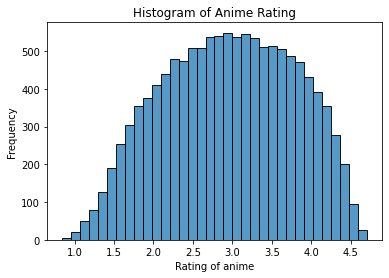

In [66]:
# create a histogram of the rating column


sns.histplot(data = anime, x = "rating")
plt.xlabel("Rating of anime")
plt.ylabel("Frequency")
plt.title("Histogram of Anime Rating")
plt.show()

### Boxplot
- This can be used to visualize a single quantitative variable or one quantitative and one categorical variable

In [68]:
anime["rating"].describe()

count    12101.000000
mean         2.949037
std          0.827385
min          0.844000
25%          2.304000
50%          2.965000
75%          3.616000
max          4.702000
Name: rating, dtype: float64

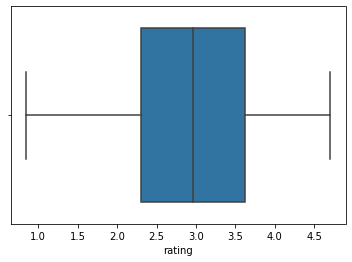

In [67]:
# create a boxplot of the rating and duration column

sns.boxplot(data = anime, x = "rating");


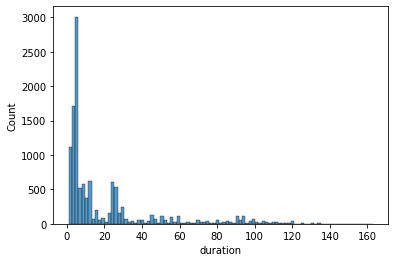

In [71]:
sns.histplot(data = anime, x = "duration");

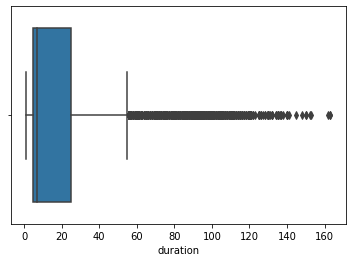

In [69]:
sns.boxplot(data = anime, x = "duration");

### Countplot
- This is used to visualize a single categorical variable

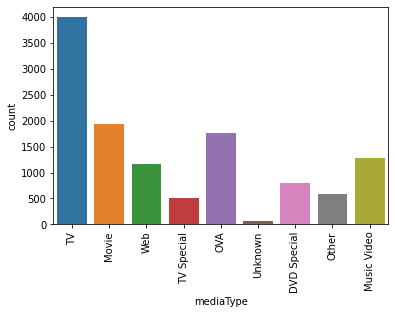

In [73]:
# create a countplot of the media type and studio_primary columns

sns.countplot(data = anime, x = "mediaType")
plt.xticks(rotation = 90);


### Bivariate Analysis
- This involves studying the relationship between two variables

#### Correlation Matrix using heatmap

In [74]:
# select all columns except those that starts with tag since they contain 0 or 1

corr_cols = [item for item in anime.columns if "tag" not in item]

corr_cols

['mediaType',
 'eps',
 'duration',
 'ongoing',
 'sznOfRelease',
 'contentWarn',
 'watched',
 'watching',
 'wantWatch',
 'dropped',
 'rating',
 'votes',
 'years_running',
 'studio_primary',
 'studios_colab']

In [77]:
# create a correlation matrix

corr_mat = anime[corr_cols].corr()

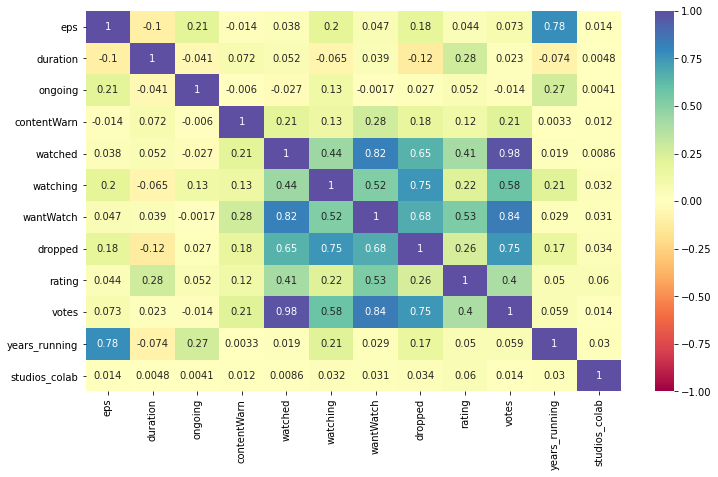

In [81]:
# create a heatmap using the correlation matrix
plt.figure(figsize = (12, 7))
sns.heatmap(data = corr_mat, annot=True, vmin = -1, vmax = 1, cmap = "Spectral");



### Categorical Plot

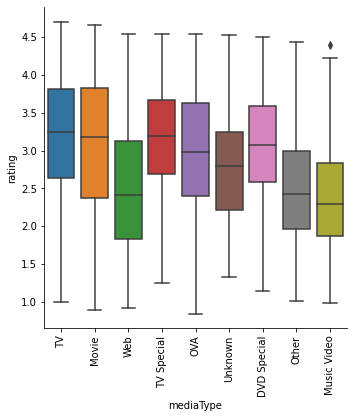

In [90]:
# what is the relationship of media type on the rating of an anime?

sns.catplot(data = anime, x = "mediaType", y = "rating", kind = "box")
plt.xticks(rotation = 90);


### Scatter Plot
- This is used to visualize two quantitative variables

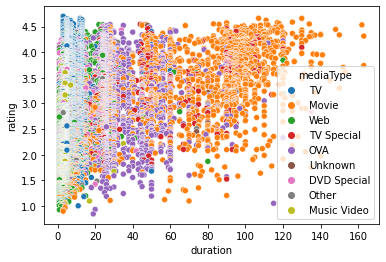

In [92]:
# What is the effect of duration on the rating of an anime?

sns.scatterplot(data = anime, x = "duration", y = "rating", hue = "mediaType");



In [93]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

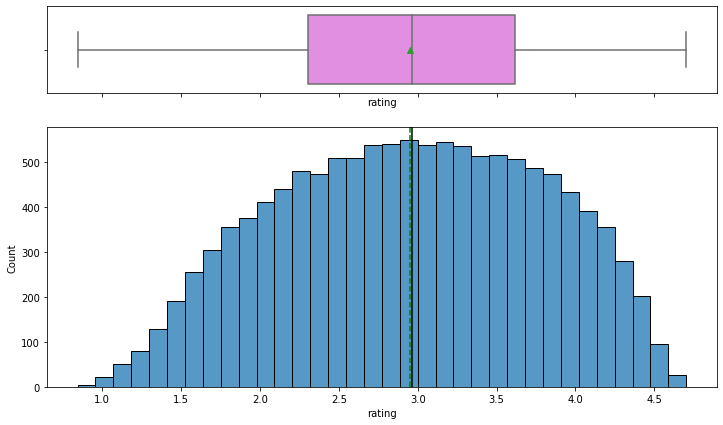

In [94]:
histogram_boxplot(data = anime, feature = "rating")

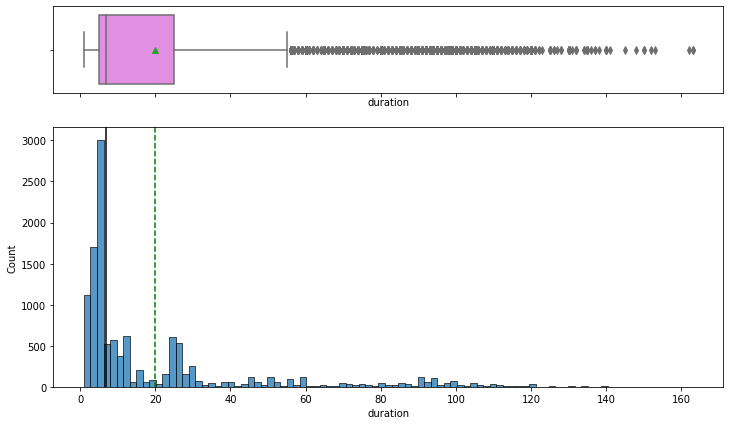

In [95]:
histogram_boxplot(data = anime, feature = "duration")

In [96]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

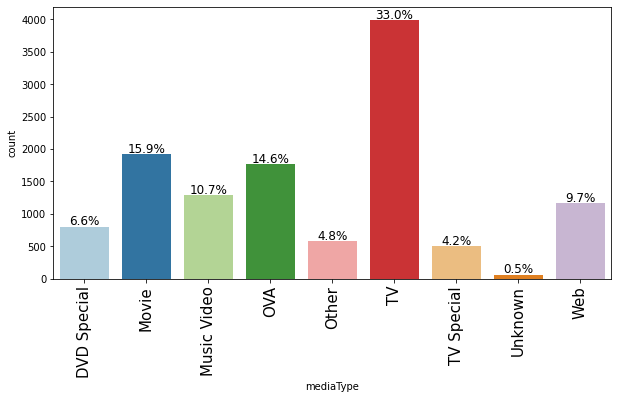

In [98]:
labeled_barplot(data = anime, feature = "mediaType", perc = True)

### <a id='link1'>Summary of EDA</a>

**Data Description:**

- The target variable (`rating`) is of *float* type.
- Columns like `title`, `description`, `mediaType`, `studio`, etc. are of *object* type.
- `ongoing` column is of *bool* type.
- All other columns are numeric in nature.
- There are no duplicate values in the data.
- There are a lot of missing values in the data.


**Data Cleaning:**

- The `title` and `description` columns are dropped for modeling as they are highly textual in nature.
- The `duration` column was converted from string to numeric by applying the *time_to_minutes* function.
- The `studios` column was processed to convert the list of values into a suitable format for analysis and modeling.
- The missing values in the data are treated as follows:
    - Missing values in the target variable `rating` were dropped.
    - Missing values in `startYr` were dropped.
    - Missing values in `finishYr` were imputed with *2020*.
    - Missing values in `sznOfRelease` were imputed with a new category *'is_missing'*.
    - Missing values in `mediaType` were imputed with a new category *'Unknown'*.
    - Missing values in `duration` and `watched` columns were imputed by the median values grouped by `studio_primary` and `mediaType`. The remaining missing values in these columns, if any, were imputed by column medians over the entire data.
- The `startYr` and `finishYr` columns were combined to create a new feature `years_running`. The original columns were then dropped.


## Exercise 2
1.	Using the Names.csv data, read in the data and set the columns of the data as (First_name, Last_name, Address, City, State, Area_code, and Income) in this order. 
 
2.	Create another column in the Names data and name it “Tax”, which has value 0.25 where the income is between 10000 and 40000, 0.3 for income between 40000 and 80000, and 0.35 for values greater than 80000. 
 
3.	Using the shifts.xlsx data, find the total Units sold for each of the regions. 
 
4.	Find the top three sales reps that had the highest units sold in total, also listing the total units sold by each of them. 
 
5.	Using visualization, find the product with the highest unit sold and state the units sold. 
 
6.	Similarly, using visualization, find the region with the highest units sold. 
 
7.	Create a visualization to examine the shift with the highest units sold. 
